In [1]:
from sklearn.datasets import load_diabetes
#sklearn.datasets의 load_diabetes에서 데이터호출
di = load_diabetes()

df_X=di.data
df_y=di.target
#diabetes의 data를 df_X에, target을 df_y에 저장


In [2]:
for i,feature_name in enumerate(di.feature_names):
  print(f'feature {i+1} : {feature_name}')
#특성확인

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [3]:
print('<df_X[0]> : ',df_X[0])
print()
print('<df_y[0]> : ',df_y[0] )

#환자의 데이터확인

<df_X[0]> :  [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]

<df_y[0]> :  151.0


In [4]:
import numpy as np

df_X= np.array(df_X)
df_y= np.array(df_y)

#넘파이 배열이겠지만 그래도...변환!

print(df_X.shape)
print(df_y.shape)

#각각의 쉐입 확인

(442, 10)
(442,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

#sklearn의 내장된 train_test_split호출
#8:2의 비율로 데이터 분리

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [7]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

#환자의 특성이 10개 이기에 w에는 10개의 랜덤상수,b에는 한개의 랜덤 상수가 들어가있다.

In [8]:
#모델생성!!
def model(X, W, b):
    pre = 0
    for i in range(9):
        pre += X[:, i] * W[i]
    pre += b
    return pre

In [9]:
#손실함수로 실제값과 예상값의 차를 제곱평균인 MSE로 설정
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    pre = model(X, W, b)
    L = MSE(pre, y)
    return L


In [10]:
#기울기 계산함수
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("슝=3")

슝=3


In [11]:
L_rate=0.9
#0.9가 다양한 값을 테스트했을때 베스트로 보인다.

Iteration 1 : Loss 27666.4818
Iteration 2 : Loss 25901.1551
Iteration 3 : Loss 24270.7168
Iteration 4 : Loss 22764.6853
Iteration 5 : Loss 21373.3979
Iteration 6 : Loss 20087.9463
Iteration 7 : Loss 18900.1181
Iteration 8 : Loss 17802.3418
Iteration 9 : Loss 16787.6371
Iteration 10 : Loss 15849.5685
Iteration 11 : Loss 14982.2026
Iteration 12 : Loss 14180.0687
Iteration 13 : Loss 13438.1230
Iteration 14 : Loss 12751.7149
Iteration 15 : Loss 12116.5563
Iteration 16 : Loss 11528.6933
Iteration 17 : Loss 10984.4801
Iteration 18 : Loss 10480.5547
Iteration 19 : Loss 10013.8171
Iteration 20 : Loss 9581.4084
Iteration 21 : Loss 9180.6923
Iteration 22 : Loss 8809.2374
Iteration 23 : Loss 8464.8015
Iteration 24 : Loss 8145.3166
Iteration 25 : Loss 7848.8753
Iteration 26 : Loss 7573.7185
Iteration 27 : Loss 7318.2234
Iteration 28 : Loss 7080.8933
Iteration 29 : Loss 6860.3474
Iteration 30 : Loss 6655.3120
Iteration 31 : Loss 6464.6120
Iteration 32 : Loss 6287.1633
Iteration 33 : Loss 6121.9657


Iteration 326 : Loss 2963.4037
Iteration 327 : Loss 2962.8365
Iteration 328 : Loss 2962.2748
Iteration 329 : Loss 2961.7185
Iteration 330 : Loss 2961.1675
Iteration 331 : Loss 2960.6218
Iteration 332 : Loss 2960.0813
Iteration 333 : Loss 2959.5460
Iteration 334 : Loss 2959.0158
Iteration 335 : Loss 2958.4907
Iteration 336 : Loss 2957.9706
Iteration 337 : Loss 2957.4555
Iteration 338 : Loss 2956.9454
Iteration 339 : Loss 2956.4401
Iteration 340 : Loss 2955.9397
Iteration 341 : Loss 2955.4440
Iteration 342 : Loss 2954.9531
Iteration 343 : Loss 2954.4668
Iteration 344 : Loss 2953.9852
Iteration 345 : Loss 2953.5083
Iteration 346 : Loss 2953.0358
Iteration 347 : Loss 2952.5679
Iteration 348 : Loss 2952.1044
Iteration 349 : Loss 2951.6454
Iteration 350 : Loss 2951.1907
Iteration 351 : Loss 2950.7404
Iteration 352 : Loss 2950.2943
Iteration 353 : Loss 2949.8525
Iteration 354 : Loss 2949.4149
Iteration 355 : Loss 2948.9815
Iteration 356 : Loss 2948.5522
Iteration 357 : Loss 2948.1270
Iteratio

Iteration 656 : Loss 2905.6332
Iteration 657 : Loss 2905.6053
Iteration 658 : Loss 2905.5777
Iteration 659 : Loss 2905.5502
Iteration 660 : Loss 2905.5230
Iteration 661 : Loss 2905.4961
Iteration 662 : Loss 2905.4693
Iteration 663 : Loss 2905.4428
Iteration 664 : Loss 2905.4165
Iteration 665 : Loss 2905.3904
Iteration 666 : Loss 2905.3645
Iteration 667 : Loss 2905.3389
Iteration 668 : Loss 2905.3134
Iteration 669 : Loss 2905.2882
Iteration 670 : Loss 2905.2632
Iteration 671 : Loss 2905.2383
Iteration 672 : Loss 2905.2137
Iteration 673 : Loss 2905.1893
Iteration 674 : Loss 2905.1651
Iteration 675 : Loss 2905.1411
Iteration 676 : Loss 2905.1172
Iteration 677 : Loss 2905.0936
Iteration 678 : Loss 2905.0702
Iteration 679 : Loss 2905.0469
Iteration 680 : Loss 2905.0238
Iteration 681 : Loss 2905.0010
Iteration 682 : Loss 2904.9783
Iteration 683 : Loss 2904.9558
Iteration 684 : Loss 2904.9335
Iteration 685 : Loss 2904.9113
Iteration 686 : Loss 2904.8894
Iteration 687 : Loss 2904.8676
Iteratio

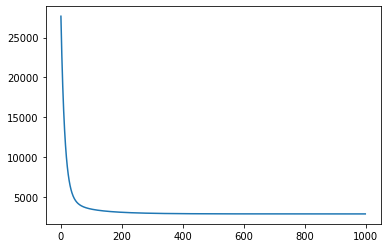

In [12]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= L_rate * dW
    b -= L_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [13]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2901.1467481652817

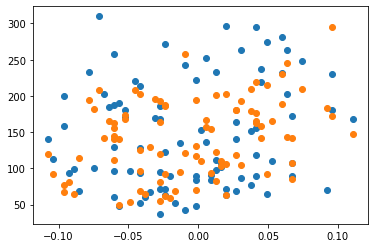

In [14]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()